## Students Performance Indicator

### Lifecycle of project
*   Understanding the probelm statement 
*   Data Collection 
*   Data Checks to perform 
*   EDA
*   Data Pre-processing
*   Model Training
*   Choose best model

###  Problem Statement

*   this project understands how student performance (test scores) is affected by other features gender,ethinicity,Parental level of education and test preparation course

### Data Collection 
*   Dataset Link : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams



In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Read data and Explore

In [3]:
df=pd.read_csv(r'data\StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


###

In [5]:
# missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
#Duplicate value
df.duplicated().sum()

np.int64(0)

In [7]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
# statistics of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("Categories in < gender > column :",end=" ")
print(df['gender'].unique())

print("categories in < race or ethinicity > column :",end=" ")
print(df['race/ethnicity'].unique())

print("categories in < rparental level of education > column :",end=" ")
print(df['parental level of education'].unique())

print("categories in < lunch > column :",end=" ")
print(df['lunch'].unique())

print("categories in < test preparation course  > column :",end=" ")
print(df['test preparation course'].unique())

Categories in < gender > column : ['female' 'male']
categories in < race or ethinicity > column : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in < rparental level of education > column : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in < lunch > column : ['standard' 'free/reduced']
categories in < test preparation course  > column : ['none' 'completed']


In [21]:
# Num and cat features
num_features=[]
cat_features=[]
for i in df.columns:
    if df[i].dtype!='object':
        num_features.append(i)
    else:
        cat_features.append(i)

In [22]:
num_features

['math score', 'reading score', 'writing score']

In [23]:
cat_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

#### Adding columns for "Total Score" and "Average"

In [24]:
df["tota_score"]=df['math score']+df['reading score']+df['writing score']
df["Avg_score"]=df["tota_score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,tota_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
full_scr_reading=df[df['reading score']==100]['Avg_score'].count()
full_scr_writing=df[df['writing score']==100]['Avg_score'].count()
full_scr_math=df[df['math score']==100]['Avg_score'].count()

In [28]:
print("Number of students who scored full marks in reading:", full_scr_reading)
print("Number of students who scored full marks in writing:", full_scr_writing)
print("Number of students who scored full marks in math:", full_scr_math)

Number of students who scored full marks in reading: 17
Number of students who scored full marks in writing: 14
Number of students who scored full marks in math: 7


In [36]:
scr_reading_20=df[df['reading score']<=20]['Avg_score'].count()
scr_writing_20=df[df['writing score']<=20]['Avg_score'].count()
scr_math_20=df[df['math score']<=20]['Avg_score'].count()

In [37]:
print("Number of students who scored less than or equal to 20 in reading:", scr_reading_20)
print("Number of students who scored less than or equal to 20 in writing:", scr_writing_20)
print("Number of students who scored less than or equal to 20 in math:", scr_math_20)

Number of students who scored less than or equal to 20 in reading: 1
Number of students who scored less than or equal to 20 in writing: 3
Number of students who scored less than or equal to 20 in math: 4


### Visulaization

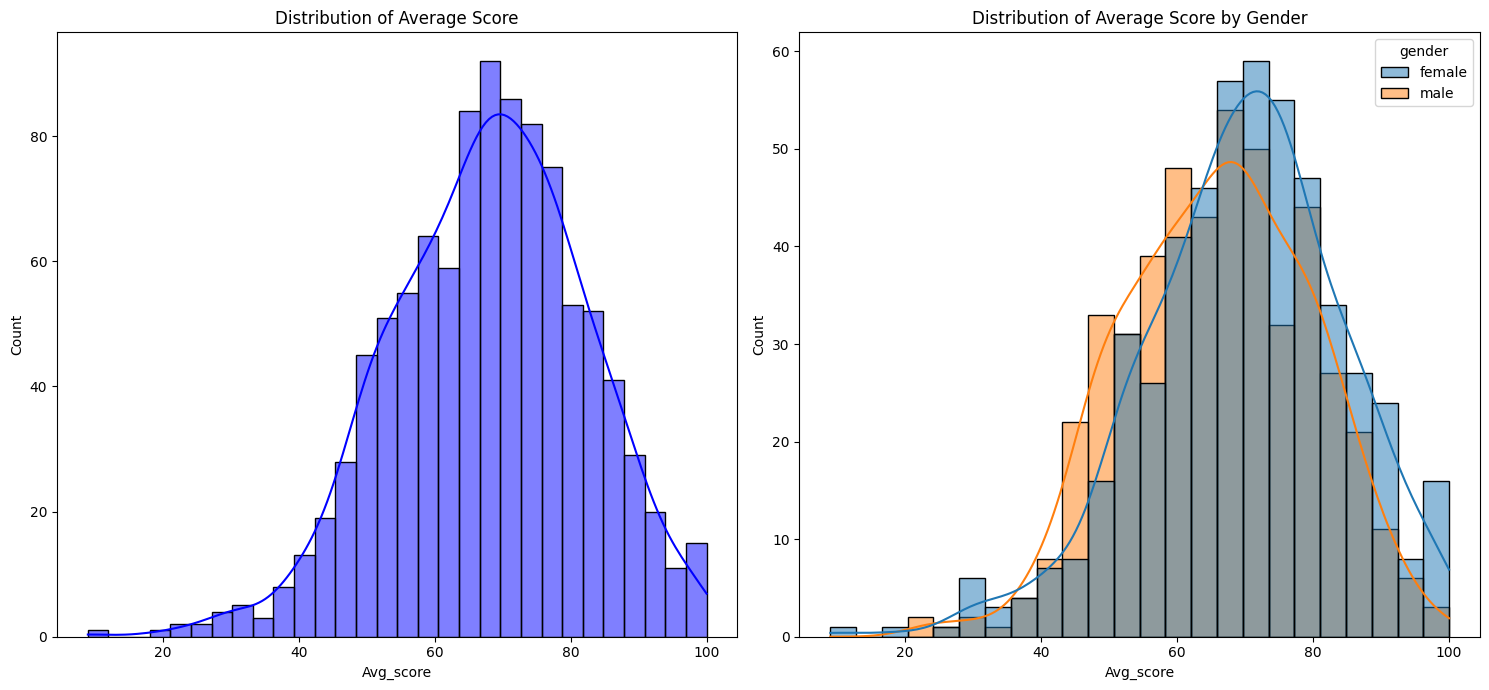

In [40]:
# Histogram and kde
fig,axs = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df, x='Avg_score', bins=30, kde=True, color='blue', ax=axs[0])
axs[0].set_title('Distribution of Average Score')
sns.histplot(data=df, x='Avg_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution of Average Score by Gender')
plt.tight_layout()
plt.show()